# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results,mouse_metadata,how='left', on = "Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
print(mouse_metadata.columns)
print(study_results.columns)

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


In [3]:
# study_data_complete["Mouse ID"].unique()

In [4]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice_ids = study_data_complete.loc[study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicated_mice_ids

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicated_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = study_data_complete[study_data_complete["Mouse ID"].isin(duplicated_mice_ids) == False]
clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = clean_study_data.groupby("Drug Regimen") ["Tumor Volume (mm3)"].mean()
medians = clean_study_data.groupby("Drug Regimen") ["Tumor Volume (mm3)"].median()
variances = clean_study_data.groupby("Drug Regimen") ["Tumor Volume (mm3)"].var()
sds = clean_study_data.groupby("Drug Regimen") ["Tumor Volume (mm3)"].std()
sems = clean_study_data.groupby("Drug Regimen") ["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_table = pd.DataFrame({
    "Mean Tumor Volume": means,
    "Median Tumor Volume": medians,
    "Variance Tumor Volume": variances,
    "Standard Deviation Tumor Volume": sds,
    "Standard Error Tumor Volume": sems
})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
stats = clean_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "std", "var", "sem"])
stats.columns = ["Mean Tumor Volume" , "Median Tumor Volume", "Variance Tumor Volume","Stds Tumor Volume","Standard errors Tumor Volume"]
# Using the aggregation method, produce the same summary statistics in a single line
stats

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Stds Tumor Volume,Standard errors Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

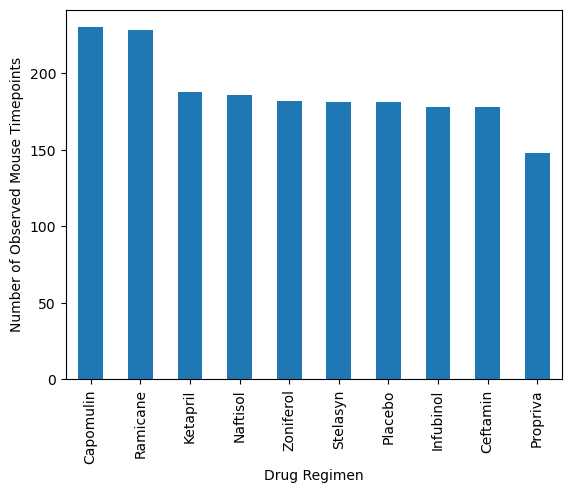

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = clean_study_data["Drug Regimen"].value_counts()
counts.plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show

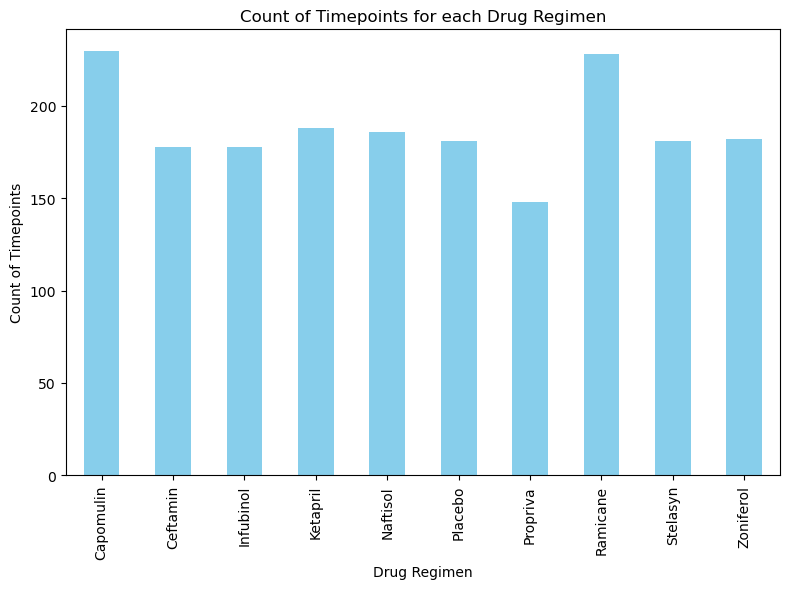

In [13]:
# Step 1: Get data
# Assuming 'clean_study_data' is a DataFrame containing columns 'Drug Regimen' and 'Timepoint'
data = clean_study_data
df = pd.DataFrame(data)
# Step 2: Create the Canvas
plt.figure(figsize=(8, 6))

# Step 3: Create the Skeleton
# Assuming you want to plot the count of timepoints for each drug regimen
# You need to aggregate the data first
df_grouped = data.groupby('Drug Regimen').count()['Timepoint']
df_grouped.plot(kind='bar', color='skyblue')

# Step 4: Customize (if needed)
plt.xlabel('Drug Regimen')
plt.ylabel('Count of Timepoints')
plt.title('Count of Timepoints for each Drug Regimen')

# Step 5: Show and Save
plt.tight_layout()
plt.show()

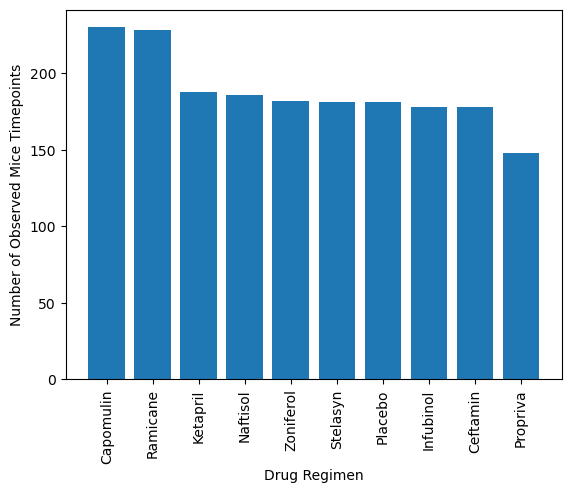

In [14]:
counts = clean_study_data["Drug Regimen"].value_counts()
plt.bar(counts.index.values, counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mice Timepoints")
plt.xticks(rotation=90)
plt.show()


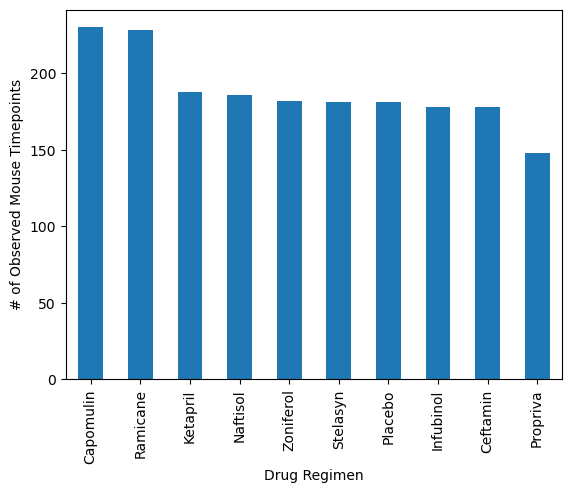

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


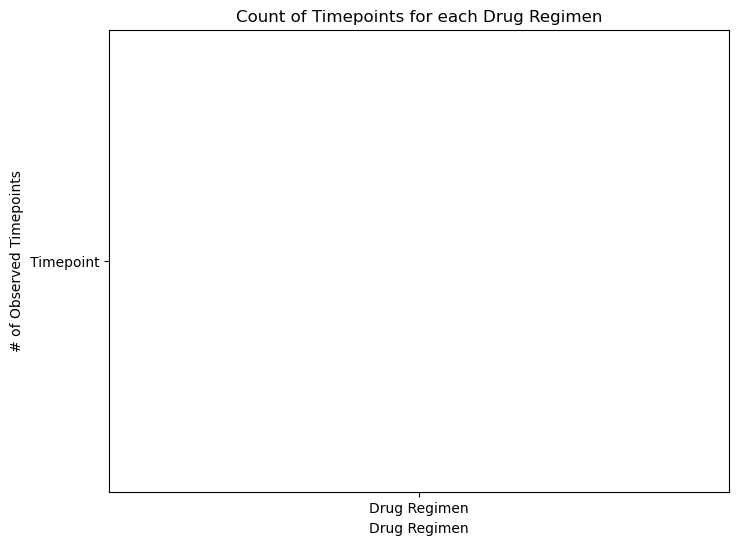

In [20]:
 #Step 1 Get data
data = clean_study_data
df = pd.DataFrame(data)
drugs = df["Drug Regimen"]
timepoint = df["Timepoint"]


#Step 2 Create the Canvas
plt.figure(figsize=(8,6))
plt.bar("Drug Regimen", "Timepoint", color='skyblue')


#Step 3 Create the Skeleton
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")
plt.title("Count of Timepoints for each Drug Regimen")

#STep 4 Customize


#Step 5 Show and Save
plt.show()


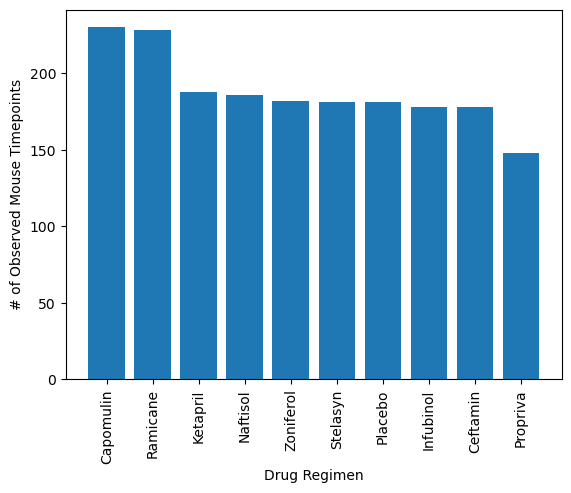

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


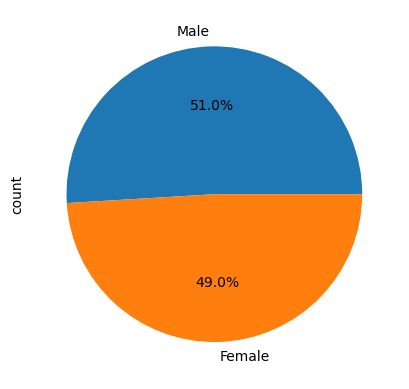

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = clean_study_data.Sex.value_counts()
counts.plot(kind='pie', autopct = '%1.1f%%')
plt.show()

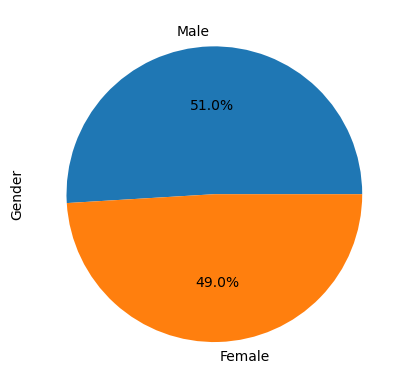

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts.values,labels=counts.index.values, autopct = '%1.1f%%')
plt.ylabel("Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regiment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = clean_study_data[clean_study_data['Drug Regimen'].isin(treatment_regiment)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(max_timepoints, filtered_df, on=['Mouse ID', 'Timepoint'], how='inner')
print(final_tumor_volume_df)

   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      a203         45           67.973419                 2    Infubinol   
1      a251         45           65.525743                 1    Infubinol   
2      a275         45           62.999356                 3     Ceftamin   
3      a411         45           38.407618                 1     Ramicane   
4      a444         45           43.047543                 0     Ramicane   
..      ...        ...                 ...               ...          ...   
95     y769         45           68.594745                 4     Ceftamin   
96     y793         45           31.896238                 2    Capomulin   
97     y865         45           64.729837                 3     Ceftamin   
98     z578         45           30.638696                 0     Ramicane   
99     z581         45           62.754451                 3    Infubinol   

       Sex  Age_months  Weight (g)  
0   Female          20          23  
1

In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty dictionary to fill with tumor volume data (for plotting)
tumor_volume_data = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume_df = filtered_df.loc[filtered_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to the dictionary
    tumor_volume_data[treatment] = final_tumor_volume_df
    
    quartiles = final_tumor_volume_df.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    outliers = final_tumor_volume_df.loc[(final_tumor_volume_df < lower_bound) | (final_tumor_volume_df > upper_bound)]
    
    print(f"Potential outliers for {treatment}: {outliers.values}")

Potential outliers for Capomulin: [25.47214326 23.34359787]
Potential outliers for Ramicane: [22.05012627]
Potential outliers for Infubinol: []
Potential outliers for Ceftamin: []


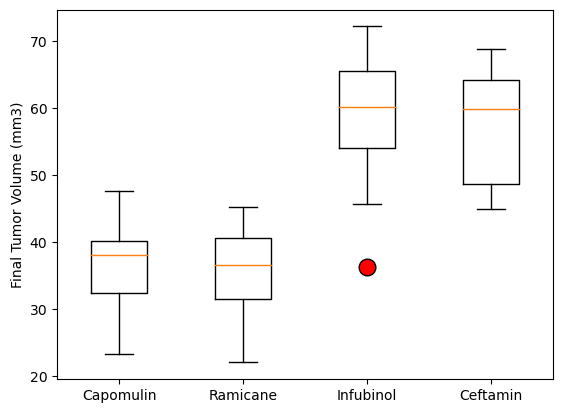

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

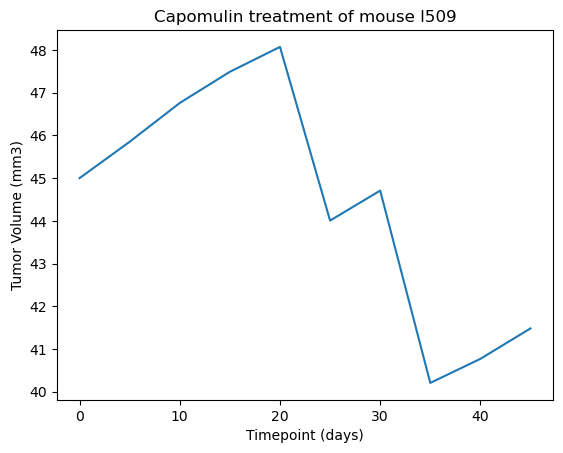

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


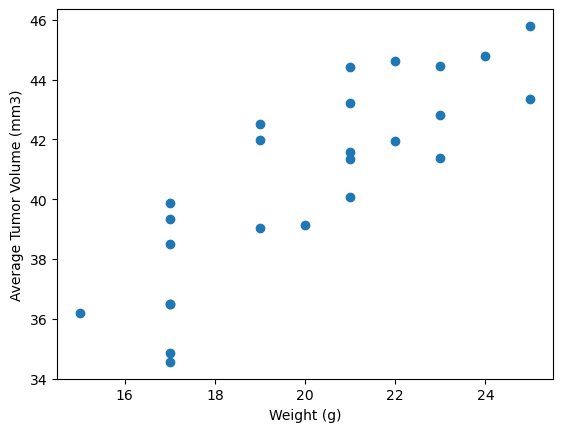

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


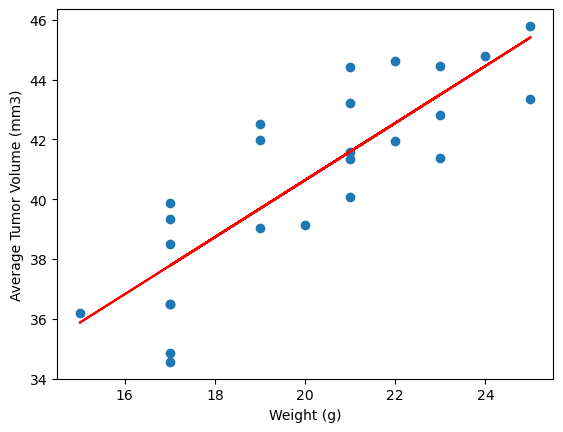

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
